In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from torch.utils.data import *

In [3]:
from torch import autograd 

# Let's first construct the points to cluster

In [4]:
#parameters for gaussian clusters
A = (-2, 1)
sigmaA = 0.5
B = (10, 12)
sigmaB = 2
n_pts = 100
C = (12.5, 0)
sigmaC = 1

In [5]:
cluster1 = sigmaA * np.random.randn(n_pts, 2) + A
cluster2 = sigmaB * np.random.randn(n_pts, 2) + B
cluster3 = sigmaC * np.random.randn(n_pts, 2) + C
list_pts = np.concatenate((cluster1, cluster2, cluster3))
list_labels = np.array([0 for i in range(n_pts)] + [1 for i in range(n_pts)] + [2 for i in range(n_pts)])
list_indices = [i for i in range(len(list_labels))]
np.random.shuffle(list_indices)
list_pts = list_pts[list_indices]
list_labels = list_labels[list_indices]


# Plot the gaussian clusters
plt.figure(figsize=(12, 10))
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1], c="r")
plt.scatter(cluster3[:, 0], cluster3[:, 1], c="g")

In [6]:
# Parameters for moon clusters
n_samples = 1500
noise = .05

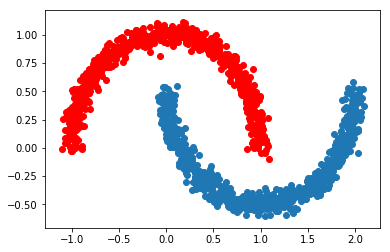

In [7]:
noisy_moons = datasets.make_moons(n_samples=1500, noise=.05)

# Plot the moon clusters
mask = noisy_moons[1].astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")

# Now let's build our first net (~logistic regression)

In [8]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3, True)
        self.fc2 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
    def fit(self, X, y):
        optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.1)
        print(y.shape)
        input = torch.from_numpy(X)
        target = torch.from_numpy(y)
        dataset = TensorDataset(input, target)
        trainloader = DataLoader(dataset, batch_size = 50)

        for epoch in range(100):
            for data in trainloader:
                input, target = data
                target = target.view(-1)
                input, target = Variable(input).float(), Variable(target)
                optimizer.zero_grad()
                output = self(input)
                loss = self.criterion(output, target)
                loss.backward()
                optimizer.step()
            if epoch == 1:
                print(loss)
        print(loss)
        
    def predict(self, X):
        input = Variable(torch.from_numpy(X)).float()
        output = net(input)
        predicted = torch.max(output.data, 1)[1]
        return predicted.numpy()
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    


In [9]:
# Plot parameters 
plot_step = 0.02  # fine step width for decision surface contours
cmap = plt.cm.Blues

Net (
  (fc1): Linear (2 -> 3)
  (fc2): LogSoftmax ()
  (criterion): NLLLoss (
  )
)
(300,)
Variable containing:
1.00000e-02 *
  3.5726
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  1.5977
[torch.FloatTensor of size 1]



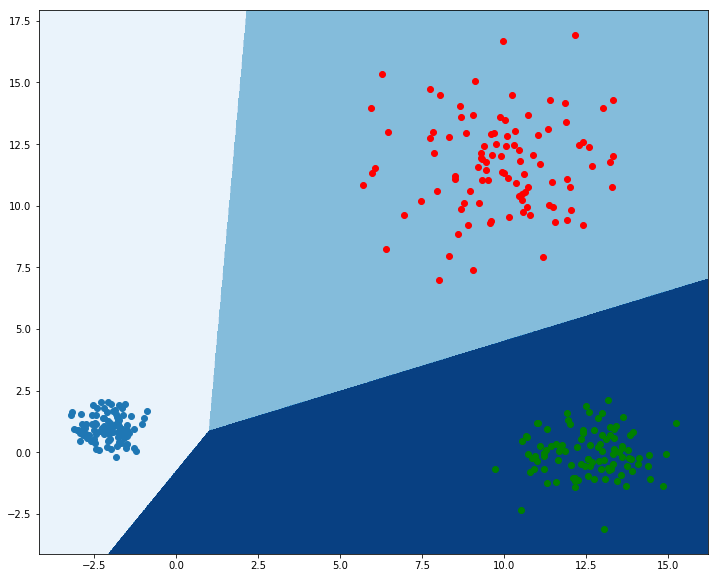

In [10]:
net = Net()
print(net)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot

x_min, x_max = list_pts[:, 0].min() - 1, list_pts[:, 0].max() + 1
y_min, y_max = list_pts[:, 1].min() - 1, list_pts[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

net.fit(list_pts, list_labels)
Z = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 10))
cs = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1], c="r")
plt.scatter(cluster3[:, 0], cluster3[:, 1], c="g")

(1500,)
Variable containing:
 0.3224
[torch.FloatTensor of size 1]

Variable containing:
 0.2854
[torch.FloatTensor of size 1]



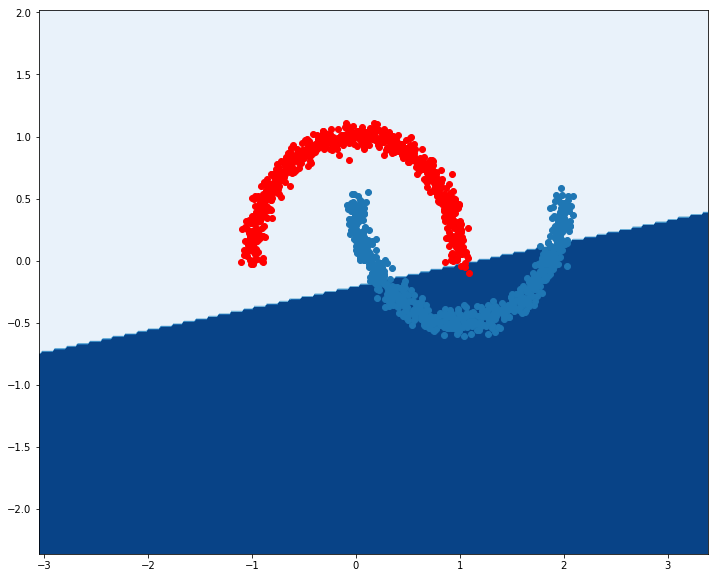

In [11]:
def normalize(vect):
    vect = (vect - np.mean(vect)) / np.std(vect)
    return vect

net = Net()

list_pts2 = normalize(noisy_moons[0])
list_labels2= noisy_moons[1]

x_min, x_max = list_pts2[:, 0].min() - 1, list_pts2[:, 0].max() + 1
y_min, y_max = list_pts2[:, 1].min() - 1, list_pts2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

net.fit(list_pts2, list_labels2)
Z1 = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

# Plot the contour
plt.figure(figsize=(12, 10))
cs = plt.contourf(xx, yy, Z1, cmap=plt.cm.Blues)

# Plot the moon clusters
mask = noisy_moons[1].astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")

# Scoring tools

In [12]:
def init_weights(m, i):
    if type(m) == nn.Linear:
        m.weight.data.fill_(i)

def init_weight_normal(neuron, mean, std):
    if type(neuron) == nn.Linear:
        neuron.weight.data.normal_(mean, std)

def init_weight_relu(neuron):
    if type(neuron) == nn.Linear:
        n = len(neuron.weight.data)
        neuron.weight.data.normal_(0, np.sqrt(2. / n))
        
def normalize(vect):
    vect = (vect - np.mean(vect)) / np.std(vect)
    return vect

In [13]:
import functools

# Now let's make our net fancier

In [14]:
def num_flat_features(x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

In [15]:
class Net2(nn.Module):
    
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(2, 5, True)
        self.fc4 = nn.Linear(5, 2, True)
        self.fc5 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    

(5, 2)

In [16]:
# 4 hidden layer of width 5

class Net3(nn.Module):
    
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(2, 5, True)
        self.fc2 = nn.Linear(5, 5, True)
        self.fc3 = nn.Linear(5, 5, True)
        self.fc4 = nn.Linear(5, 5, True)
        self.fc5 = nn.Linear(5, 2, True)
        self.fc6 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        X = self.fc5(x)
        x = self.fc6(x)
        return x


In [17]:
# 1 hidden layer of width 20

class Net4(nn.Module):
    
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(2, 20, True)
        #self.fc2 = nn.Linear(2, 20, True)
        self.fc4 = nn.Linear(20, 2, True)
        self.fc5 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, num_flat_features(x))
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
    

In [18]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MultiInitialisationClassifier(BaseEstimator, ClassifierMixin):
    """ Sklearn-compatible classifier that implement a pytorch feedforward neural network 
    and tries several weight initialisation in its "fit" method"""
    
    
    def __init__(self, net_class=nn.Sequential, criterion=nn.NLLLoss()):
        self.net_class = net_class
        self.trained_net = None
        self.criterion = criterion
        
        
    def fit(self, X, y, batch_size=32, n_epochs=10, n_inits_per_optimizer=15, 
            optimizer_classes={"SGD":functools.partial(optim.Adam, lr=0.1)}):
        
        ## Load the data
        input, target = torch.from_numpy(X), torch.from_numpy(y)
        dataset = TensorDataset(input, target)
        trainloader = DataLoader(dataset, batch_size = batch_size, shuffle=True)
        net_list = list()

        ## Create the different initialisation (i.e create different nets)
        for i, key in enumerate(optimizer_classes.keys()):
            for k in range(n_inits_per_optimizer):
                net = self.net_class()       
                net.apply(init_weight_relu)
                net_list.append([net, optimizer_classes[key](net.parameters()), 0.0])

        ## Train the net
        loss_list = list()
        for epoch in range(n_epochs):
            for net in net_list :
                net[2] = 0.0
            for data in trainloader:
                input, target = data
                target = target.view(-1)
                input, target = Variable(input).float(), Variable(target).long()
                for i in range(len(net_list)):
                    net, optimizer, _ = net_list[i]
                    optimizer.zero_grad()
                    output = net(input)
                    loss = net.criterion(output, target)
                    loss.backward()
                    optimizer.step()
                    net_list[i][2] += loss.data[0]
            if len(net_list) > 1:
                print(min([net[2] for net in net_list]))
                loss_list.append(min([net[2] for net in net_list]))
                del net_list[argmax([net[2] for net in net_list])]
            print(epoch)
            
        self.trained_net = net_list[argmin([net[2] for net in net_list])][0]
        
        return loss_list
    
    
    def predict(self, X):
        if not self.trained_net:
            raise RuntimeError("You must train the classifier before predicting !")
        input = Variable(torch.from_numpy(X)).float()
        output = self.trained_net(input)
        predicted = torch.max(output.data, 1)[1]
        return predicted.numpy()
        
    def predict_proba(self, X):
        if not self.trained_net:
            raise RuntimeError("You must train the classifier before predicting !")
        input = Variable(torch.from_numpy(X)).float()
        output = self.trained_net(input)
        predicted = output.data
        return predicted.numpy()
    


In [19]:
list_pts2 = normalize(noisy_moons[0])
list_labels2= noisy_moons[1]

x_min, x_max = list_pts2[:, 0].min() - 1, list_pts2[:, 0].max() + 1
y_min, y_max = list_pts2[:, 1].min() - 1, list_pts2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

def plot_moons():
    list_pts = normalize(noisy_moons[0])
    mask = noisy_moons[1].astype("bool")
    plt.scatter(list_pts[mask][:, 0], list_pts[mask][:, 1])
    mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
    plt.scatter(list_pts[mask][:, 0], list_pts[mask][:, 1], c="r")

8.8216907084
0
1.27030649921
1
0.293013046146
2
0.17500523699
3
0.127504788485
4
0.0803184179531
5
0.0590014638292
6
0.0592896564485
7
0.0452920506286
8
0.0289356438989
9


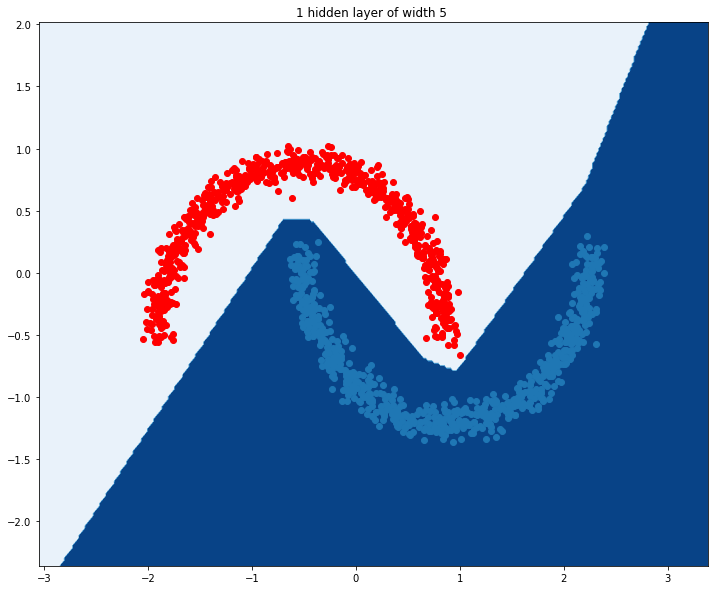

In [20]:
clf = MultiInitialisationClassifier(Net2, nn.NLLLoss())


clf.fit(list_pts2, list_labels2)
Z2 = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# Plot the contour 
plt.figure(figsize=(12, 10))
plt.title("1 hidden layer of width 5 ")
cs = plt.contourf(xx, yy, Z2, cmap=plt.cm.Blues)

# Plot the moon clusters
plot_moons()

16.072314091
0
0.795594683885
1
0.0680590683041
2
0.0168852429015
3
0.0118945265385
4
0.00838207615379
5
0.00432825826124
6
0.00287575108746
7
0.00226086122007
8
0.00185284587815
9


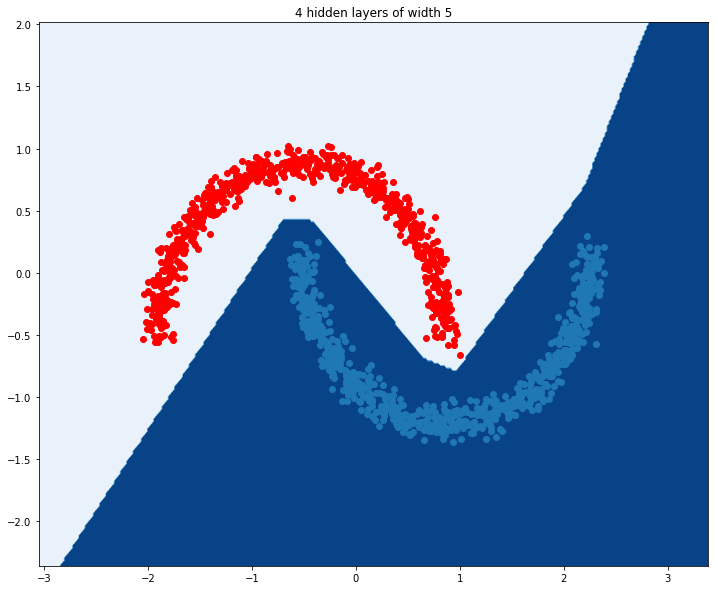

In [21]:
clf = MultiInitialisationClassifier(Net3, nn.NLLLoss())


clf.fit(list_pts2, list_labels2)
Z3 = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

# Plot the contour 
plt.figure(figsize=(12, 10))
plt.title("4 hidden layers of width 5")
cs = plt.contourf(xx, yy, Z2, cmap=plt.cm.Blues)

# Plot the moon clusters
plot_moons()

3.68054410431
0
0.145741910441
1
0.0907317442616
2
0.0328425651096
3
0.0266919880123
4
0.0155191975173
5
0.0106691149085
6
0.0100267566613
7
0.00848263391345
8
0.00763019531769
9


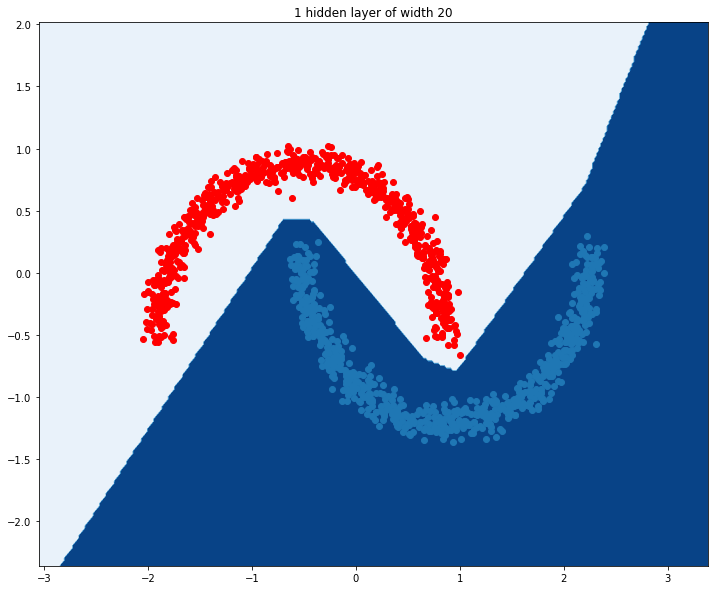

In [22]:
clf = MultiInitialisationClassifier(Net4, nn.NLLLoss())


clf.fit(list_pts2, list_labels2)
Z4 = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)

# Plot the contour 
plt.figure(figsize=(12, 10))
plt.title("1 hidden layer of width 20")
cs = plt.contourf(xx, yy, Z2, cmap=plt.cm.Blues)

# Plot the moon clusters
plot_moons()

In [24]:
Z4 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
print(Z4)

[[ -3.27303886e+00  -3.86276394e-02]
 [ -3.76298809e+00  -2.34879665e-02]
 [ -4.25883055e+00  -1.42397340e-02]
 ..., 
 [ -2.26864548e+01  -1.40410350e-10]
 [ -2.29899559e+01  -1.03653974e-10]
 [ -2.32934589e+01  -7.65201236e-11]]


from sklearn.model_selection import cross_val_score
clf = MultiInitialisationClassifier(Net4, nn.NLLLoss())
list_pts2 = normalize(noisy_moons[0])
list_labels2= noisy_moons[1]
print(cross_val_score(clf, list_pts2, list_labels2))

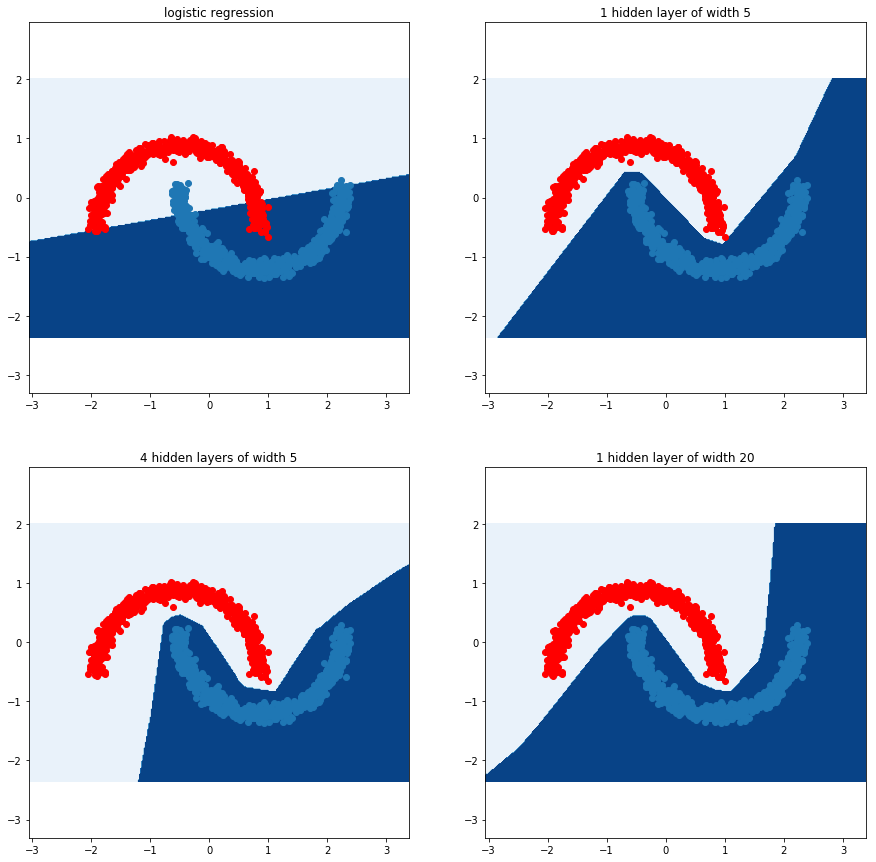

In [23]:
list_contours = [Z1, Z2, Z3, Z4]
list_titles = ["logistic regression", "1 hidden layer of width 5", "4 hidden layers of width 5", "1 hidden layer of width 20"]
f, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()
for i in range(4):
    ax[i].axis("equal")
    ax[i].set_title(list_titles[i])
    list_pts = normalize(noisy_moons[0])
    cs = ax[i].contourf(xx, yy, list_contours[i], cmap=cmap)
    mask = noisy_moons[1].astype("bool")
    ax[i].scatter(list_pts[mask][:, 0], list_pts[mask][:, 1])
    mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
    ax[i].scatter(list_pts[mask][:, 0], list_pts[mask][:, 1], c="r")


In [24]:
# Scoring function (a bit redundant now that we have MultiInitialisationClassifier)

def plot_scores(trainset, optimizer_classes, net_class):
    # Preparing plotting
    f, ax = plt.subplots(int(len(optimizer_classes.keys()) / 2) , 2, figsize=(25, 25))
    f.subplots_adjust(wspace=0.5, hspace=0.5)
    ax = ax.flatten()

    
    optimizer_loss_list = list()

    for i, key in enumerate(optimizer_classes.keys()):
        ax[i].set_title(key)
        best_loss_list = list()
        for xp in range(1):
            clf = MultiInitialisationClassifier(net_class, nn.NLLLoss())
            optimizer = optimizer_classes[key]
            loss_list  = clf.fit(trainset[0], trainset[1], optimizer_classes={"opti":optimizer})
            ax[i].plot([j for j in range(len(loss_list))], loss_list)
            best_loss_list.append(loss_list[-1])
        optimizer_loss_list.append(best_loss_list)

    print(optimizer_loss_list)
    # Display statistics
    for i, key in enumerate(optimizer_classes.keys()):
        print(key)
        best_loss_vect = np.array(optimizer_loss_list[i])
        print( "Loss :  moyenne={} , ecart_type={}, max ={}, min={} \n".format(np.mean(best_loss_vect), np.std(best_loss_vect), np.max(best_loss_vect), np.min(best_loss_vect)))

11.419264501
0
0.213176589576
1
0.0233888427028
2
0.0119692804292
3
0.00860453335918
4
0.0066338695251
5
0.00552244629216
6
0.00469593234811
7
0.00407634831572
8
0.003644080296
9
46.5752397776
0
22.222261101
1
10.2586152926
2
6.5532220602
3
4.05260860734
4
2.46768382564
5
1.38854482677
6
0.793894595001
7
0.462571332231
8
0.276427657576
9
13.1079179011
0
0.896679525264
1
0.128165819388
2
0.0243769917142
3
0.0128692838771
4
0.00931002634024
5
0.00374910679466
6
0.00170688138405
7
0.00139312277997
8
0.00116374928371
9
13.798344831
0
1.34683523746
1
0.215043872595
2
0.0873923093604
3
0.0458460849841
4
0.0233279903987
5
0.0169395045268
6
0.0152562364074
7
0.0130642597687
8
0.00873979242897
9
[[0.0036440802959987195], [0.27642765757627785], [0.0011637492837053287], [0.00873979242896894]]
SGD lr=0.1 momentum=0.9
Loss :  moyenne=0.003644080296 , ecart_type=0.0, max =0.003644080296, min=0.003644080296 

Adadelta
Loss :  moyenne=0.276427657576 , ecart_type=0.0, max =0.276427657576, min=0.2764276

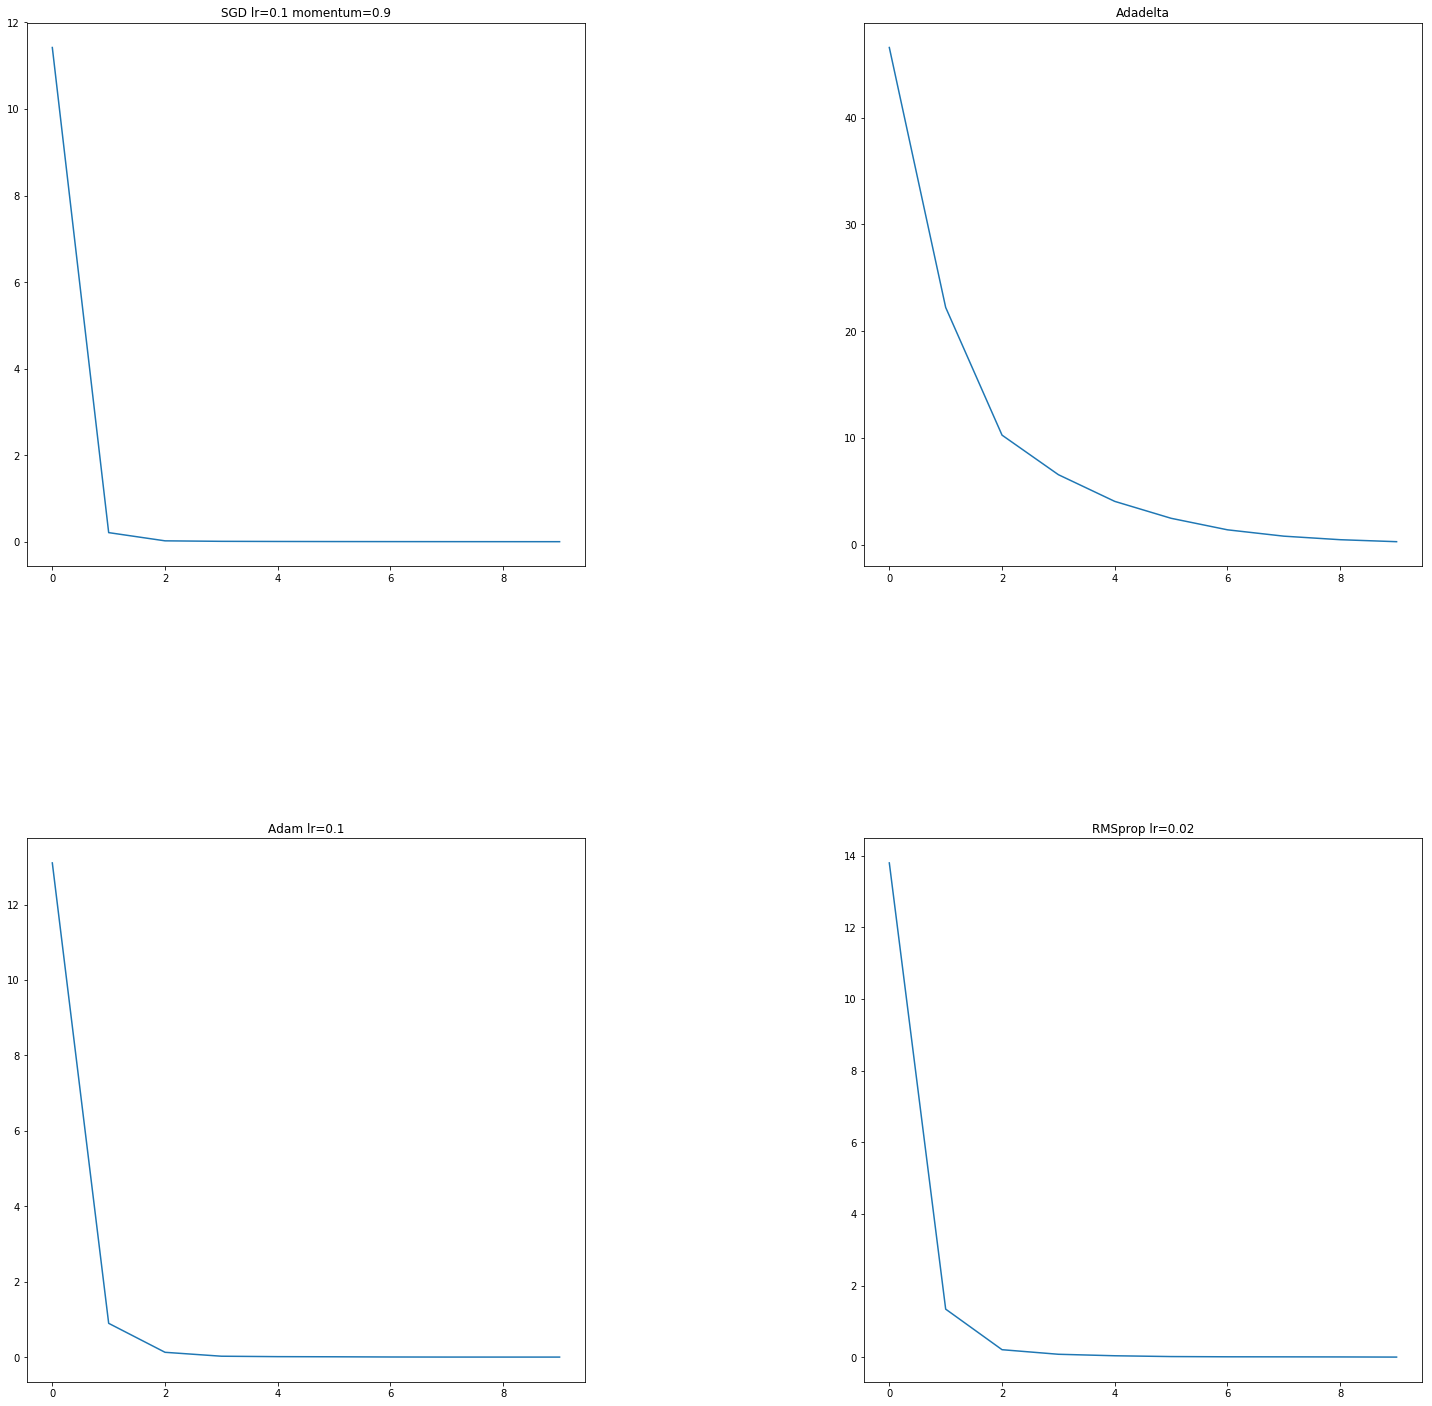

In [25]:
trainset = [normalize(list_pts2), list_labels2]
optimizer_classes = { "SGD lr=0.1 momentum=0.9":functools.partial(optim.SGD, lr=0.1, momentum=0.9), 
                         "Adam lr=0.1":functools.partial(optim.Adam, lr=0.1), 
                         "Adadelta":functools.partial(optim.Adadelta),
                         "RMSprop lr=0.02":functools.partial(optim.RMSprop, lr=0.02)
                        }
plot_scores(trainset, optimizer_classes, Net3)


In [26]:
np.argnanmin

AttributeError: 'module' object has no attribute 'argnanmin'